In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 입력데이터 : 환자의 상태, 실제값 : 당뇨 여부
# /content/drive/MyDrive/Colab Notebooks/classifier/diabetes.csv
# 데이터 로딩
filename = '/content/drive/MyDrive/Colab Notebooks/classifier/diabetes.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float32)
data=(data-np.min(data,0))/(np.max(data,0)-np.min(data,0))   # 정규화
print(data.shape)

(768, 9)


In [ ]:
# 학습 데이터 : 8  테스트 데이터 : 2
x_train = data[0 : 600, 0 : -1]
y_train = data[0 : 600, [-1]]
x_test = data[600 : , 0 : -1]
y_test = data[600 : , [-1]]
print(x_train[0 : 5])

[[0.3529412  0.74371856 0.59016395 0.35353535 0.         0.5007451
  0.23441501 0.48333332]
 [0.05882353 0.42713568 0.5409836  0.2929293  0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.919598   0.52459013 0.         0.         0.34724292
  0.25362936 0.18333334]
 [0.05882353 0.44723618 0.5409836  0.23232323 0.11111111 0.41877797
  0.0380017  0.        ]
 [0.         0.68844223 0.32786885 0.35353535 0.19858156 0.64232486
  0.9436379  0.2       ]]


In [ ]:
model = Sequential()
model.add(Dense(1, input_dim = 8, activation = 'sigmoid'))   # 활성화 함수가 sigmoid 임
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습과정 설정하기
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])
filename = '/content/drive/MyDrive/Colab Notebooks/classifier/diabetes.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)
# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
# 모델 학습
hist = model.fit(
                  x_train, y_train,                        # 입력 / 라벨
                  epochs = 50, batch_size = 1,            # 학습 회수 / 학습 10번 후 오차 감소
                  validation_data=(x_test, y_test),        # 검증 데이터
                  callbacks = [monitor_val_lose, modelCheckpoint] # 저장 및 모니터링
                 )

Epoch 1/50
600/600 [==============================] - 2s 2ms/step - loss: 0.7000 - accuracy: 0.5633 - val_loss: 0.6843 - val_accuracy: 0.6131
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5983 - val_loss: 0.6768 - val_accuracy: 0.6071
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.6050 - val_loss: 0.6724 - val_accuracy: 0.6071
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6781 - accuracy: 0.6150 - val_loss: 0.6698 - val_accuracy: 0.6131
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6755 - accuracy: 0.6283 - val_loss: 0.6679 - val_accuracy: 0.6131
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6735 - accuracy: 0.6300 - val_loss: 0.6665 - val_accuracy: 0.6131
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.6367 - val_loss: 0.6654 - val_accuracy: 0.6131
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6310


[0.6269053220748901, 0.6309523582458496]

In [ ]:
predit = model.predict(x_test)
for i in range(0,len(predit)) :
    if predit[i] >= 0.5 :
        predit[i] = 1
    else :
        predit[i] = 0
    print("예측값 : ", predit[i], "\t실제값 : ", y_test[i])

6/6 [==============================] - 0s 2ms/step
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [1.]
예측값 :  [0.] 	실제값 :  [0.]
예측값 :  [0.] 	실제값 :  [0.]

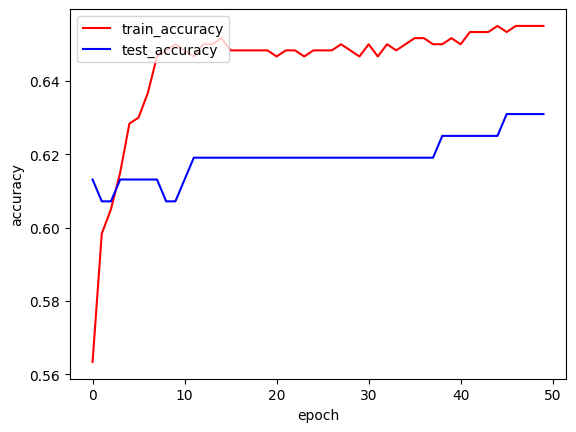

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(hist.history['loss'], 'r', label = 'train_loss')
plt.plot(hist.history['accuracy'], 'r', label = 'train_accuracy')
#plt.plot(hist.history['val_loss'], 'b', label = 'test_loss')
plt.plot(hist.history['val_accuracy'], 'b', label = 'test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()